In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import lifelines

In [3]:
df = pd.read_csv('telco.csv')
df

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


In [4]:
df.set_index('ID', inplace=True)

In [5]:
df['churn'] = pd.Series(np.where(df.churn.values == "Yes", 1, 0), df.index)

In [6]:
cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat'] 
survival_df = pd.get_dummies(df, columns = cols, prefix = cols, drop_first = True)
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.000000001, survival_df["tenure"])
survival_df.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13.0,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11.0,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68.0,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33.0,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23.0,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


### Building AFT Models

In [7]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter

In [8]:
log_norm = LogNormalAFTFitter()
weibull = WeibullAFTFitter()
log_logistic = LogLogisticAFTFitter()

In [13]:
log_norm.fit(survival_df, duration_col = "tenure", event_col="churn")
print(log_norm.summary)

                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
mu_    address                          0.042538   1.043456  0.008904   
       age                              0.032670   1.033209  0.007254   
       custcat_E-service                1.066401   2.904907  0.170532   
       custcat_Plus service             0.924929   2.521689  0.215751   
       custcat_Total service            1.198617   3.315528  0.250452   
       ed_Did not complete high school  0.373624   1.452990  0.201587   
       ed_High school degree            0.315938   1.371546  0.163183   
       ed_Post-undergraduate degree    -0.034399   0.966186  0.223172   
       ed_Some college                  0.272306   1.312989  0.165346   
       forward_Yes                     -0.198139   0.820256  0.180037   
       gender_Male                      0.051869   1.053238  0.114287   
       income                           0.001396   

In [14]:
weibull.fit(survival_df, duration_col="tenure", event_col="churn")
print(weibull.summary)

                                             coef  exp(coef)  se(coef)  \
param   covariate                                                        
lambda_ address                          0.041363   1.042230  0.008821   
        age                              0.027802   1.028192  0.006748   
        custcat_E-service                0.977597   2.658060  0.155731   
        custcat_Plus service             0.739767   2.095447  0.192965   
        custcat_Total service            0.995856   2.707040  0.213172   
        ed_Did not complete high school  0.437873   1.549409  0.194276   
        ed_High school degree            0.319959   1.377071  0.145973   
        ed_Post-undergraduate degree     0.223556   1.250516  0.190606   
        ed_Some college                  0.253833   1.288957  0.144665   
        forward_Yes                     -0.098678   0.906034  0.148202   
        gender_Male                      0.004320   1.004329  0.103055   
        income                        

In [15]:
log_logistic.fit(survival_df, duration_col="tenure", event_col="churn")
print(log_logistic.summary)

                                            coef  exp(coef)  se(coef)  \
param  covariate                                                        
alpha_ address                          0.038920   1.039687  0.008814   
       age                              0.032441   1.032973  0.006942   
       custcat_E-service                1.040155   2.829656  0.165176   
       custcat_Plus service             0.863530   2.371517  0.209202   
       custcat_Total service            1.202978   3.330019  0.240610   
       ed_Did not complete high school  0.434034   1.543471  0.198774   
       ed_High school degree            0.335415   1.398521  0.154862   
       ed_Post-undergraduate degree    -0.023335   0.976936  0.215783   
       ed_Some college                  0.240953   1.272461  0.155660   
       forward_Yes                     -0.194778   0.823018  0.170370   
       gender_Male                      0.040035   1.040847  0.110132   
       income                           0.001040   

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


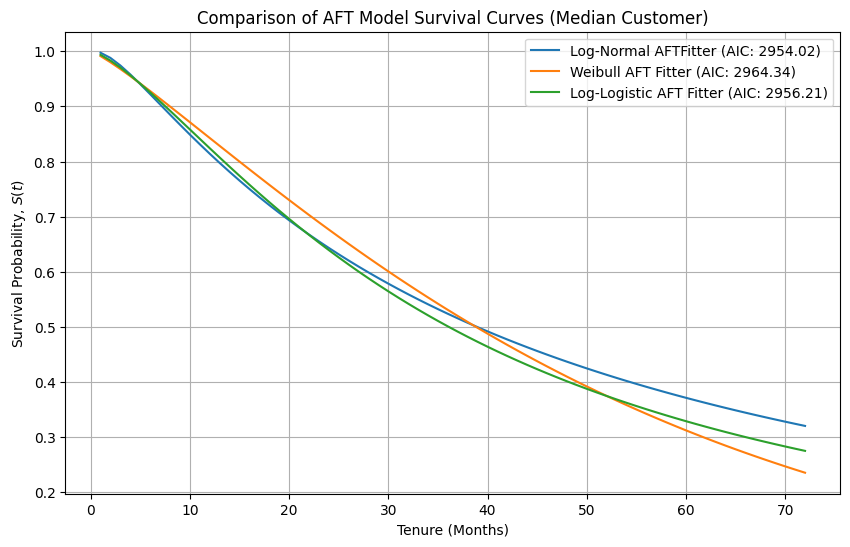

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define reference data point (must use survival_df_full)
ref_data = survival_df.drop(columns=['tenure', 'churn']).median().to_frame().T

# Predict and plot, including AIC in the label
plt.plot(log_norm.predict_survival_function(ref_data), label=f"Log-Normal AFTFitter (AIC: {log_norm.AIC_:.2f})")
plt.plot(weibull.predict_survival_function(ref_data), label=f"Weibull AFT Fitter (AIC: {weibull.AIC_:.2f})")
plt.plot(log_logistic.predict_survival_function(ref_data), label=f"Log-Logistic AFT Fitter (AIC: {log_logistic.AIC_:.2f})")

plt.title('Comparison of AFT Model Survival Curves (Median Customer)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability, $S(t)$')
plt.legend()
plt.grid(True)
plt.savefig('aft_model_comparison.png')
plt.show()

When comparing AIC scoress the best one is the Log-Normal as it has the lowest AIC score. Apart from AIC scores and plots, other crucial factors influence model selection. Model complexity, denoted by the number of parameters, is one such factor. Log-Normal and Log-Logistic models have three parameters each, while Weibull has two.
Another consideration is the hazard rate. For instance, choosing the Weibull model over the exponential model is appropriate if the data displays a non-constant hazard rate. The Weibull model can effectively capture both increasing and decreasing hazard rates.

In [17]:
#We need to keep the significant columns which are the following (if we tak 95%)
survival_df = survival_df[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [18]:
survival_df

,tenure,churn,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes
ID,,,,,,,,,,
1,13.0,1,9,44,False,False,False,False,False,False
2,11.0,1,7,33,False,False,True,False,False,True
3,68.0,0,24,52,False,True,False,False,False,False
4,33.0,1,12,33,False,False,False,False,True,False
5,23.0,0,9,30,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
996,10.0,0,0,39,False,False,False,False,True,False
997,7.0,0,2,34,False,False,False,False,True,False
998,67.0,0,40,59,False,False,True,True,True,True


In [20]:
#as we have chosen log-normal we will keep it as our final model
ln = log_norm.fit(survival_df, duration_col='tenure', event_col='churn')
print(ln.summary)

                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef upper 95%  exp(c

# CLV Analysis

In [21]:
m = 1200
r = 0.1
T = 60
times = np.arange(1, T + 1)
clv_preds = ln.predict_survival_function(survival_df, times=times)

discount_factors = 1 / (1 + r / 12)**times

clv = m * clv_preds.T.dot(discount_factors)

df["CLV"] = clv.values

In [25]:
df

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,46674.516267
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,47236.563336
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,55579.137489
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,38294.070887
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,49373.751859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,0,34312.326972
997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,0,32932.550353
998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,0,54050.765905


In [26]:
#Tjose are the customers that are more probable to stay with the company. 

# #Exploring CLV with Different Segmetns

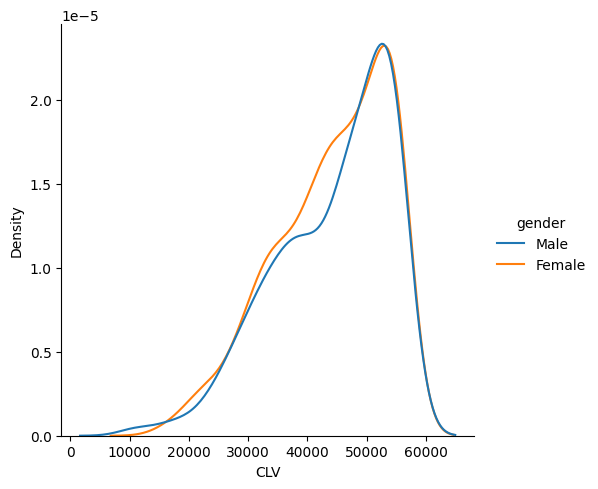

In [27]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'gender')

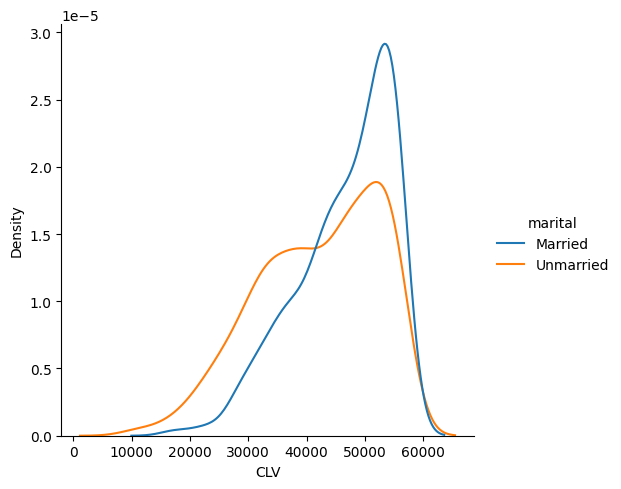

In [28]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'marital')

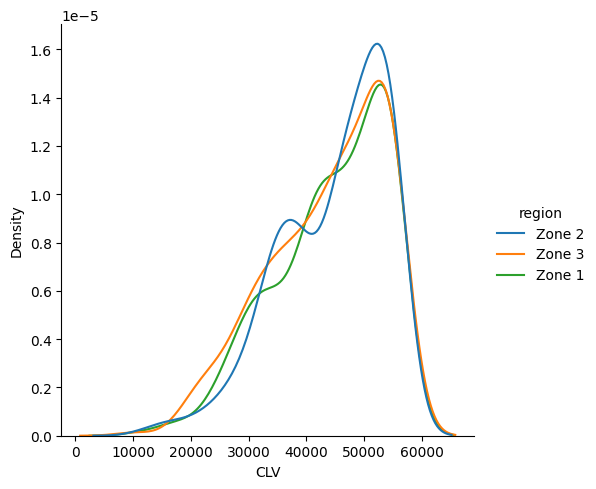

In [29]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'region')

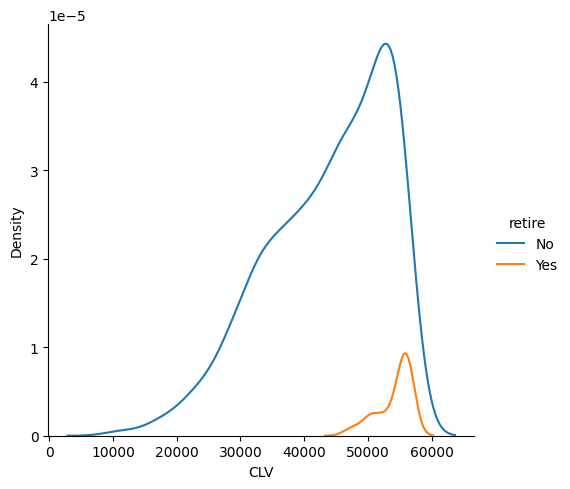

In [30]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'retire')

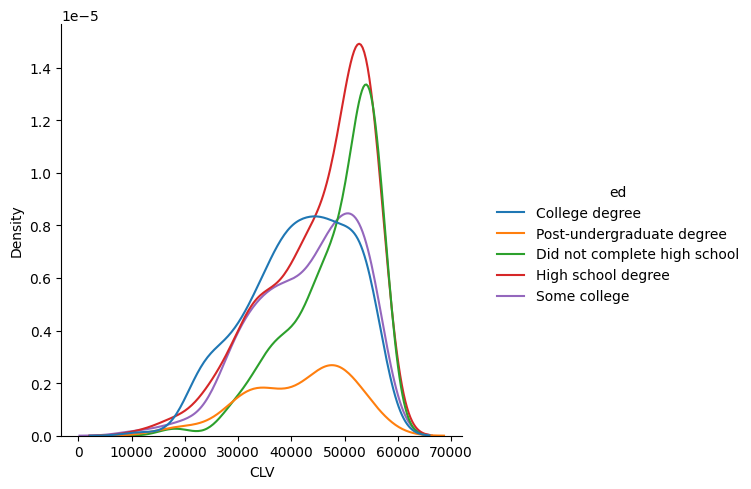

In [31]:
sns.displot(data = df, kind = 'kde', x = 'CLV', hue = 'ed')

In [32]:
print(df.groupby("gender")[["CLV"]].mean())
print(df.groupby("marital")[["CLV"]].mean())
print(df.groupby("region")[["CLV"]].mean())
print(df.groupby("retire")[["CLV"]].mean())
print(df.groupby("ed")[["CLV"]].mean())

                 CLV
gender              
Female  44139.353838
Male    44320.340684
                    CLV
marital                
Married    46541.448296
Unmarried  41957.927877
                 CLV
region              
Zone 1  44309.269617
Zone 2  44728.371517
Zone 3  43662.527852
                 CLV
retire              
No      43734.388139
Yes     54210.608259
                                       CLV
ed                                        
College degree                41597.952824
Did not complete high school  48033.655136
High school degree            45122.517219
Post-undergraduate degree     41320.951021
Some college                  43141.811804


In [33]:
T_12 = 12
times_12 = np.arange(1, T_12 + 1)

S12_preds = ln.predict_survival_function(survival_df, times=[T_12])
S12 = S12_preds.loc[T_12, :]

clv_preds_12 = ln.predict_survival_function(survival_df, times=times_12)
discount_factors_12 = 1 / (1 + r / 12)**times_12
clv_12 = m * clv_preds_12.T.dot(discount_factors_12)

ECLV_12 = (1 - S12) * clv_12.values

TPCLV = ECLV_12.sum()

retention_fraction = 0.15
retention_budget = retention_fraction * TPCLV

print(f"Total Potential Lost CLV in 12 months (TPCLV): {TPCLV:,.2f}")
print(f"Suggested Annual Retention Budget (15% of TPCLV): {retention_budget:,.2f}")

Total Potential Lost CLV in 12 months (TPCLV): 1,309,501.75
Suggested Annual Retention Budget (15% of TPCLV): 196,425.26


# Findings

The analysis of Customer Lifetime Value (CLV) across various customer segments reveals key insights into customer value drivers and risk profiles, which must guide future strategy.  

**Gender:** Male customers exhibit a slightly higher average CLV (44,320.34) compared to female customers (44,139.35), a minor difference that suggests gender is not a primary value differentiator.  

**Marital Status:** Married individuals have an average CLV of 46,541.45, substantially higher than the 41,957.93 average for unmarried individuals.  

**Most Valuable Segment:** Retired customers (Yes) boast an average CLV of 54,210.61, over 10,000 higher than non-retired customers (No) at 43,734.39, indicating that this segment deserves priority attention for retention efforts.  

**Geography:** Zone 2 registers the highest average CLV (44,728.37), although regional variations are small.  

**Education Level:** Surprisingly, the highest CLV belongs to the "Did not complete high school" segment (48,033.66), and the lowest belongs to the "Post-undergraduate degree" segment (41,320.95), suggesting that product usage or income factors override academic achievement as value drivers.  

**Model Interpretation:** The AFT model's predictions imply a strong negative correlation between CLV and churn risk, meaning customers with a higher predicted CLV are more stable and less likely to terminate their service. A positive coefficient indicates that an increase in that variable extends the expected customer lifetime (reducing churn), while a negative coefficient decreases it; the magnitude reflects the strength of this effect.  

**Retention Recommendation:** The company's retention efforts should focus on high-value segments (especially retired and married customers) and be guided by the calculated Total Potential Lost CLV (TPCLV) of $1,309,501.75 over the next 12 months, which justifies a suggested Annual Retention Budget of 196,425.26 (15 per cent of TPCLV).
